In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score

In [100]:
df = pd.read_csv("insurance.csv")
print(df.head())
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [101]:
df.isnull().sum()   # no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [102]:
# Implemented LabelEncoder for sex & smoker column
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])     # female-0 & male-1
df['smoker_encoded'] = le.fit_transform(df['smoker'])       # yes-1 & no-0
print(df.head())

   age     sex     bmi  children smoker     region      charges  sex_encoded  \
0   19  female  27.900         0    yes  southwest  16884.92400            0   
1   18    male  33.770         1     no  southeast   1725.55230            1   
2   28    male  33.000         3     no  southeast   4449.46200            1   
3   33    male  22.705         0     no  northwest  21984.47061            1   
4   32    male  28.880         0     no  northwest   3866.85520            1   

   smoker_encoded  
0               1  
1               0  
2               0  
3               0  
4               0  


In [103]:
# Implemented OneHotEncoder for region column
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df[['region']])
features = encoder.get_feature_names_out(['region'])
one_hot = pd.DataFrame(encoded, columns=features) # resultant comes in features is "Array", so it should be converted in DataFrame

df_encoded = pd.concat([df, one_hot], axis=1)   # concat both the dataframes (df) & (one_hot) - axis=1 (column)

df_encoded.drop('region', axis=1, inplace=True) # delete the original column 'region' from Dataframe. inplace=True (make chnages in original DataFrame)
print(df_encoded.head())

   age     sex     bmi  children smoker      charges  sex_encoded  \
0   19  female  27.900         0    yes  16884.92400            0   
1   18    male  33.770         1     no   1725.55230            1   
2   28    male  33.000         3     no   4449.46200            1   
3   33    male  22.705         0     no  21984.47061            1   
4   32    male  28.880         0     no   3866.85520            1   

   smoker_encoded  region_northwest  region_southeast  region_southwest  
0               1               0.0               0.0               1.0  
1               0               0.0               1.0               0.0  
2               0               0.0               1.0               0.0  
3               0               1.0               0.0               0.0  
4               0               1.0               0.0               0.0  


In [104]:
# Spliting data for training and testing
X = df_encoded[['age']]
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("\nTraining Data (X)")
print(X_train)
print("Testing Data (X)")
print(X_test)

print("\nTesting Data (y)")
print(y_train)
print("Testing Data (y)")
print(y_test)


Training Data (X)
      age
127    52
578    52
385    19
1203   51
413    25
...   ...
360    48
709    36
439    26
174    24
1146   60

[1070 rows x 1 columns]
Testing Data (X)
      age
726    41
260    58
902    26
566    38
776    40
...   ...
705    33
309    41
1183   48
1281   47
800    42

[268 rows x 1 columns]

Testing Data (y)
127      9634.53800
578      9724.53000
385      1261.85900
1203     9964.06000
413      5080.09600
           ...     
360     10043.24900
709      5469.00660
439      2897.32350
174      2855.43755
1146    52590.82939
Name: charges, Length: 1070, dtype: float64
Testing Data (y)
726      6664.68595
260     11837.16000
902      4661.28635
566      6373.55735
776      6986.69700
           ...     
705      5375.03800
309      7749.15640
1183     9447.38240
1281    24535.69855
800      7046.72220
Name: charges, Length: 268, dtype: float64


Mean Absolute Error (MAE - LinearRegression): 9055.15
Mean Squared Error (MSE - LinearRegression): 133440978.61
Root Mean Squared Error (RMSE - LinearRegression): 11551.67
R2 Score (R2 - LinearRegression): 0.09


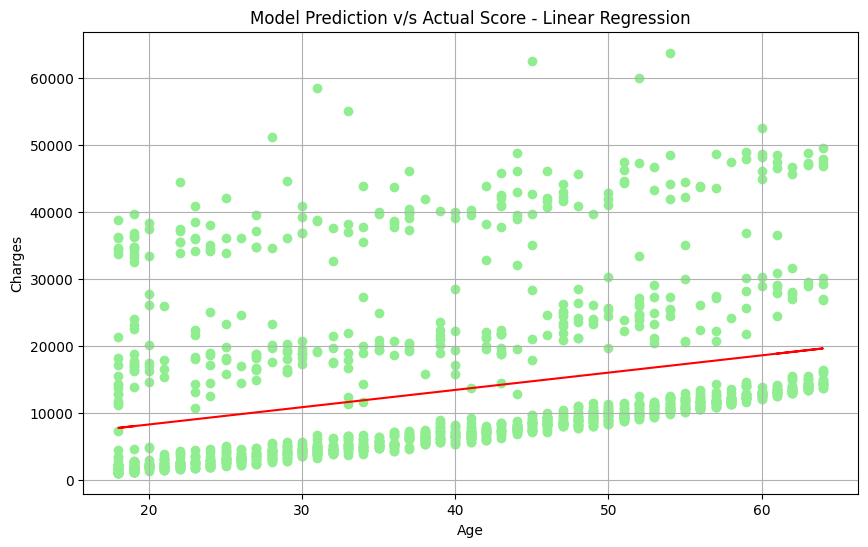

According to your age (21), your charges may be 8578.059998067834


In [ ]:
model = LinearRegression()
model.fit(X,y)

# Metrics part - Linear Regression
predicted_score1 = model.predict(X)
mae = mean_absolute_error(y, predicted_score1)
mse = mean_squared_error(y, predicted_score1)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted_score1)
print(f"Mean Absolute Error (MAE - LinearRegression): {round(mae,2)}")
print(f"Mean Squared Error (MSE - LinearRegression): {round(mse, 2)}")
print(f"Root Mean Squared Error (RMSE - LinearRegression): {round(rmse, 2)}")
print(f"R2 Score (R2 - LinearRegression): {round(r2, 2)}")

# scatter plot & regression line
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(X, y, color='lightgreen', label='Actual Scores')
plt.plot(X, predicted_score1, color="red", label="predicted_score (Regression Line)")
plt.title("Model Prediction v/s Actual Score - Linear Regression")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

inp = int(input("Enter your age: "))
inp_df = pd.DataFrame([[inp]], columns=['age'])
pred = model.predict(inp_df)[0]

print(f"According to your age ({inp}), your charges may be {pred}")

In [ ]:
# Logistic Regression
model2 = LogisticRegression()
X = df_encoded[['age']]
y = df_encoded['smoker_encoded']
model2.fit(X,y)

pred = model2.predict(inp_df)[0]
if pred == 0:
    print(f"According to your age ({inp}), you might not be smoking")
else:
    print(f"According to your age ({inp}), you might be smoking")

According to your age (21), you might not be smoking


In [107]:
knn = KNeighborsClassifier()
X = df_encoded[['age']]
y = df_encoded['smoker_encoded']
knn.fit(X, y)

prediction = knn.predict(inp_df)[0]
if prediction == 0:
    print(f"According to your age ({inp}), you might not be smoking")
else:
    print(f"According to your age ({inp}), you might be smoking")

According to your age (21), you might not be smoking
